<a href="https://colab.research.google.com/github/vicentesarabia/ADA_informes/blob/main/Informe6_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- Problema
Entrada: Un arreglo de n elementos y en "k" que pide el i-esimo elemento menor.

Salida: El valor del i-esimo elemento del arreglo. 


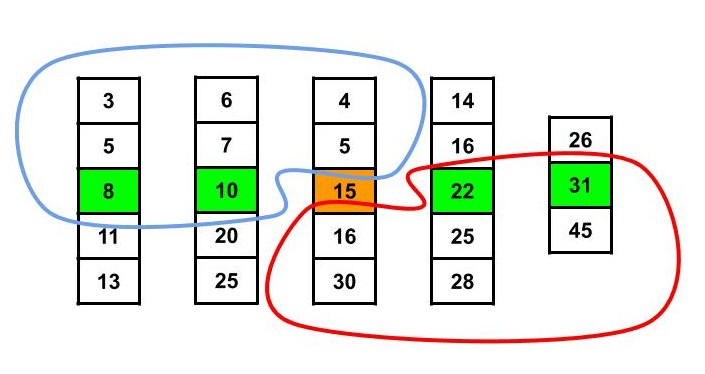


El problema a solucionar es poder obtener el i-esimo elemento más pequeño en un arreglo de n elementos de una forma eficaz

# 2.- Descripcion del algoritmo

**2.1 Descripción función Select**

Lo que hace este algoritmo es buscar el i-esimo elemento más pequeño de un arreglo de n elementos.

Este algoritmo lo primero que hace es dividir este arreglo en grupos de 5, luego a estos grupos utilizando insertion sort son ordenados para así sacar la mediana de estos grupos, luego de sacar la mediana de todos los grupos estos entran en un arreglo en el cual se saca nuevamente la mediana, para luego usar está mediada de mediana como pivote.

Luego este pivote entra en la función partición en la cual deja los elementos menores del pivote a la izquierda y los mayores a la derecha, en el cual cuando la posición es la correcta esta se retorna ,si no es asi el algoritmo se va recorriendo recursivamente hasta que el tamaño de este sea 1, ya que ese será nuestro elemento a buscar a menos que de la casualidad de que el pivote seleccionado en esa recurrencia sea él el i-esimo pedido.

A continuación la implementación de Select:

In [99]:
def InsertionSort(array,verbose=False):
  iteraciones=0
  global cont
  for i in range(1,len(array)):
    key = array[i]
    paso=0
    a=0
    
    
    if verbose==True:
       print("pasada",i)
       salir=0

    for k in range(i-1,-1,-1):
        
        
        if array[k]>key: #condicion que compara la clave con las pocisiones que estan a su izquierda
            iteraciones+=1
            cont+=1
            
            #intercambio de posiciones
            array[k+1]=array[k] 
            array[k]=key
           
        if verbose==True and paso==0: ##condicion que retorna cuando el arreglo completo ya esta ordenado
          if salir==1 and i==len(array)-1:
            return array,iteraciones

          if salir==0: #muestra el subarreglo cuando ya esta ordenado
            print(str(array)[1:-1])

          salir+=1
        if paso==0:#condicion para salir si esta ordenado ya el subarreglo
          a+=1
          if a==1:
            
            break
        
          

    if key<array[0]:
        
        array[0]=key  
        
  
  return array

In [115]:
def Select(a,arr, l, r, k,verbose):
     
    global cont
    if (k > 0 and k <= r - l + 1):
       
        # numero de elementos
        n = r - l + 1
 
        
        # dividir el arreglo en grupos de 5
        # y encontrar las medianas
        mediana = []
 
        i = 0
        while (i < n // 5):
            
            mediana.append(findMedian(a,arr, l + i * 5, 5,verbose))
            i += 1
       
       
 
        # para el ultimo grupo de menos de 5
        if (i * 5 < n):
           
            mediana.append(findMedian(a,arr, l + i * 5,
                                              n % 5,verbose))
            i += 1
 
        # encontrar media de medias si es solo 1 se retorna
       
        if i == 1:
            medDeMedianas = mediana[i - 1]
        else:
            medDeMedianas = Select(1,mediana, 0,i - 1, i // 2,verbose)
 
        # particion con el pivot de medDeMedias
        pos = partition(1,arr, l, r, medDeMedianas,verbose)
 
        # si pos es igual a nuestro i-esima
        if (pos - l == k - 1):
            
            return arr[pos]
        # si nuestra i-esima esta a la izquierda del pivote
        if (pos - l > k - 1):
            
            return Select(0,arr, l, pos - 1, k,verbose)
 
       # si el i-esimo esta a la derecha del pivote
        return Select(0,arr, pos + 1, r,k - pos + l - 1,verbose)
 
    return print("fuera de rango la i-esima")
    
 
 
def partition(a,arr, l, r, x,verbose):
    global cont
    for i in range(l, r):
        
        if arr[i] == x:
            
            
            arr[r],arr[i]=arr[i],arr[r]
            
            break
 
    x = arr[r]
    i = l
    for j in range(l, r):
        
        if (arr[j] <= x):
            cont+=1
            
            arr[i],arr[j]=arr[j],arr[i]
            
            i += 1
    arr[i],arr[r]=arr[r],arr[i]
    
    return i
 

def findMedian(a,arr, l, n,verbose):
    lis = []
    
    for i in range(l, l + n):
        
        lis.append(arr[i])
    if verbose==True and a==0 and len(lis)!=1:
       print("grupo de 5 =",lis)
    if verbose==True and a==1 and len(lis)!=1:
      print("mediana/s: ",lis)
    if verbose==True and a!=3 and len(lis)==1:
      print("pivote: ",lis)
    
    # ordenar con insertion
    lis=InsertionSort(lis)
 

    return lis[n // 2]

arr = [6, 36, 4, 28, 16, 25, 18, 27, 47, 14]
n = len(arr)
k = 3
a=0
cont=0
verbose=False
print("El",k,"elemento mas pequeño del arreglo es: ",Select(a,arr, 0, n - 1, k,verbose))
print(cont)

El 3 elemento mas pequeño del arreglo es:  14
19


**2.2 verbose = true**

In [108]:
import random
arreglo = random.sample(range(1, 50),15)
k=random.randrange(len(arreglo))
a=0
cont=0;
print("el", k, "elemento menor del arreglo")
print(arreglo)
print("el",k,"elemento menor del arreglo es",Select(a,arreglo, 0, len(arreglo) - 1,k,verbose=True))


el 1 elemento menor del arreglo
[46, 4, 6, 2, 16, 36, 26, 21, 34, 18, 19, 39, 33, 7, 49]
grupo de 5 = [46, 4, 6, 2, 16]
grupo de 5 = [36, 26, 21, 34, 18]
grupo de 5 = [19, 39, 33, 7, 49]
mediana/s:  [2, 34, 7]
pivote:  [2]
el 1 elemento menor del arreglo es 2


**2.3 Ejemplo**

arreglo = [2,6,3,7,9,13,8,23,14,75]

se quiere encontrar el 2 elemento menor del arreglo

se crea grupos de 5 para poder obtener el pivote más eficiente

grupo 1 = [2,6,3,7,9]

grupo 2 = [3,8,23,14,75]

se aplica InsertionSort a los grupos

grupo 1 = [2,3,6,7,9]

grupo 2 = [3,8,14,23,75]

se obtiene las medianas de los grupos y se ingresan a un arreglo para sacar la mediana de medianas

medDeMedianas = [6,14]

medDemedianas = 6

se utiliza el 6 como pivote para la función partición quedando el arreglo de la siguiente forma

[2, 3, **6**, 7, 9, 13, 8, 23, 14, 75]

luego se comprueba si el pivot es el i-esimo elemento pedido o es menor o mayor, en nuestro caso es menor al pivote por lo que nos vamos al arreglo de la izquierda

[2,3]

luego sacamos nuevamente la mediana de estos para tomar como pivote al ser el pivote el i-esimo elemento pedido se retorna 

El 2 elemento menor del arreglo [2,6,3,7,9,13,8,23,14,75] es igual a 3.




# 3.- Correctitud

**3.1 teorema correctitud**

El algoritmo Select entra un arreglo de n elementos y este retorna el i-esimo elemento más pequeño del arreglo.

**3.2 prueba teorema**

Para comprobar la correctitud de Select como es una función recursiva se tiene que utilizar el método de inducción, comprobando que el caso base y el paso inductivo sean verdaderos, de ser así Select es correcto

Para la base de nuestro método inductivo vamos a tener un P(n)

**Caso base**

Suponemos que n=1 (P(1)), ya que el arreglo tiene solo un elemento, la mediana de este sería el único elemento, al igual que la mediana de medianas retornando, 
entonces el elemento corresponde a el i-esimo elemento menor del arreglo por lo que el caso base es correcto.

**Paso inductivo**

En este paso hay que probar que m<n en todas las recursiones

Cuando el tamaño del subarreglo es mayor a "l" entonces i correspondre al rango de nuestro problema. Si el pivote no es el i-esimo elemento más pequeño del arreglo, este se partición en dos subarreglos, uno con los elementos mayores al pivote y otro con los elementos menores al pivote minimizando así el tamaño de nuestro **m** y resolviéndose así recursivamente hasta que este llega a nuestro caso base por lo que nuestro algoritmo Select es correcto.





#4.- Tiempo de ejecución

**4.1 teorema tiempo de ejecución**

El algoritmo Select tiene un tiempo de ejecución es O(n) en el peor caso.

**4.2 prueba de teorema**

El peor caso de nuestro algoritmo es cuando la proporción de nuestra partición queda 3/n a la izquierda y 7/n a la derecha.

Para probar nuestro teorema tenemos obtener la ecuación de recursión de nuestro algoritmo Select el cual es el siguiente:

Como en nuestro algoritmo se utiliza como algoritmo auxiliar, el Insertion sort una parte de la ecuación es $T(n)=O(n)$.

Ahora nuestro algoritmo calcula la mediana de medianas para así poder sacar el pivote más eficiente posible dividiendo en grupos de 5 por lo que nos queda la siguiente ecuación junto a la anterior $T(n)=O(n)+T(n/5)$

Y para finalizar la ecuación de recurrencia del peor caso de select , queda la siguiente ecuación de recurrencia ya definida:

$T(n) = \begin{cases}
  O(1)  & n \text{ is small} \\
  T(7n/10) + O(n)+T(n/5) & \text{ otherwise}
\end{cases}$

Teniendo la ecuación de recurrencia ya podemos sacar la cota asintótica superior para nuestro algoritmo Select el cual es el siguiente:

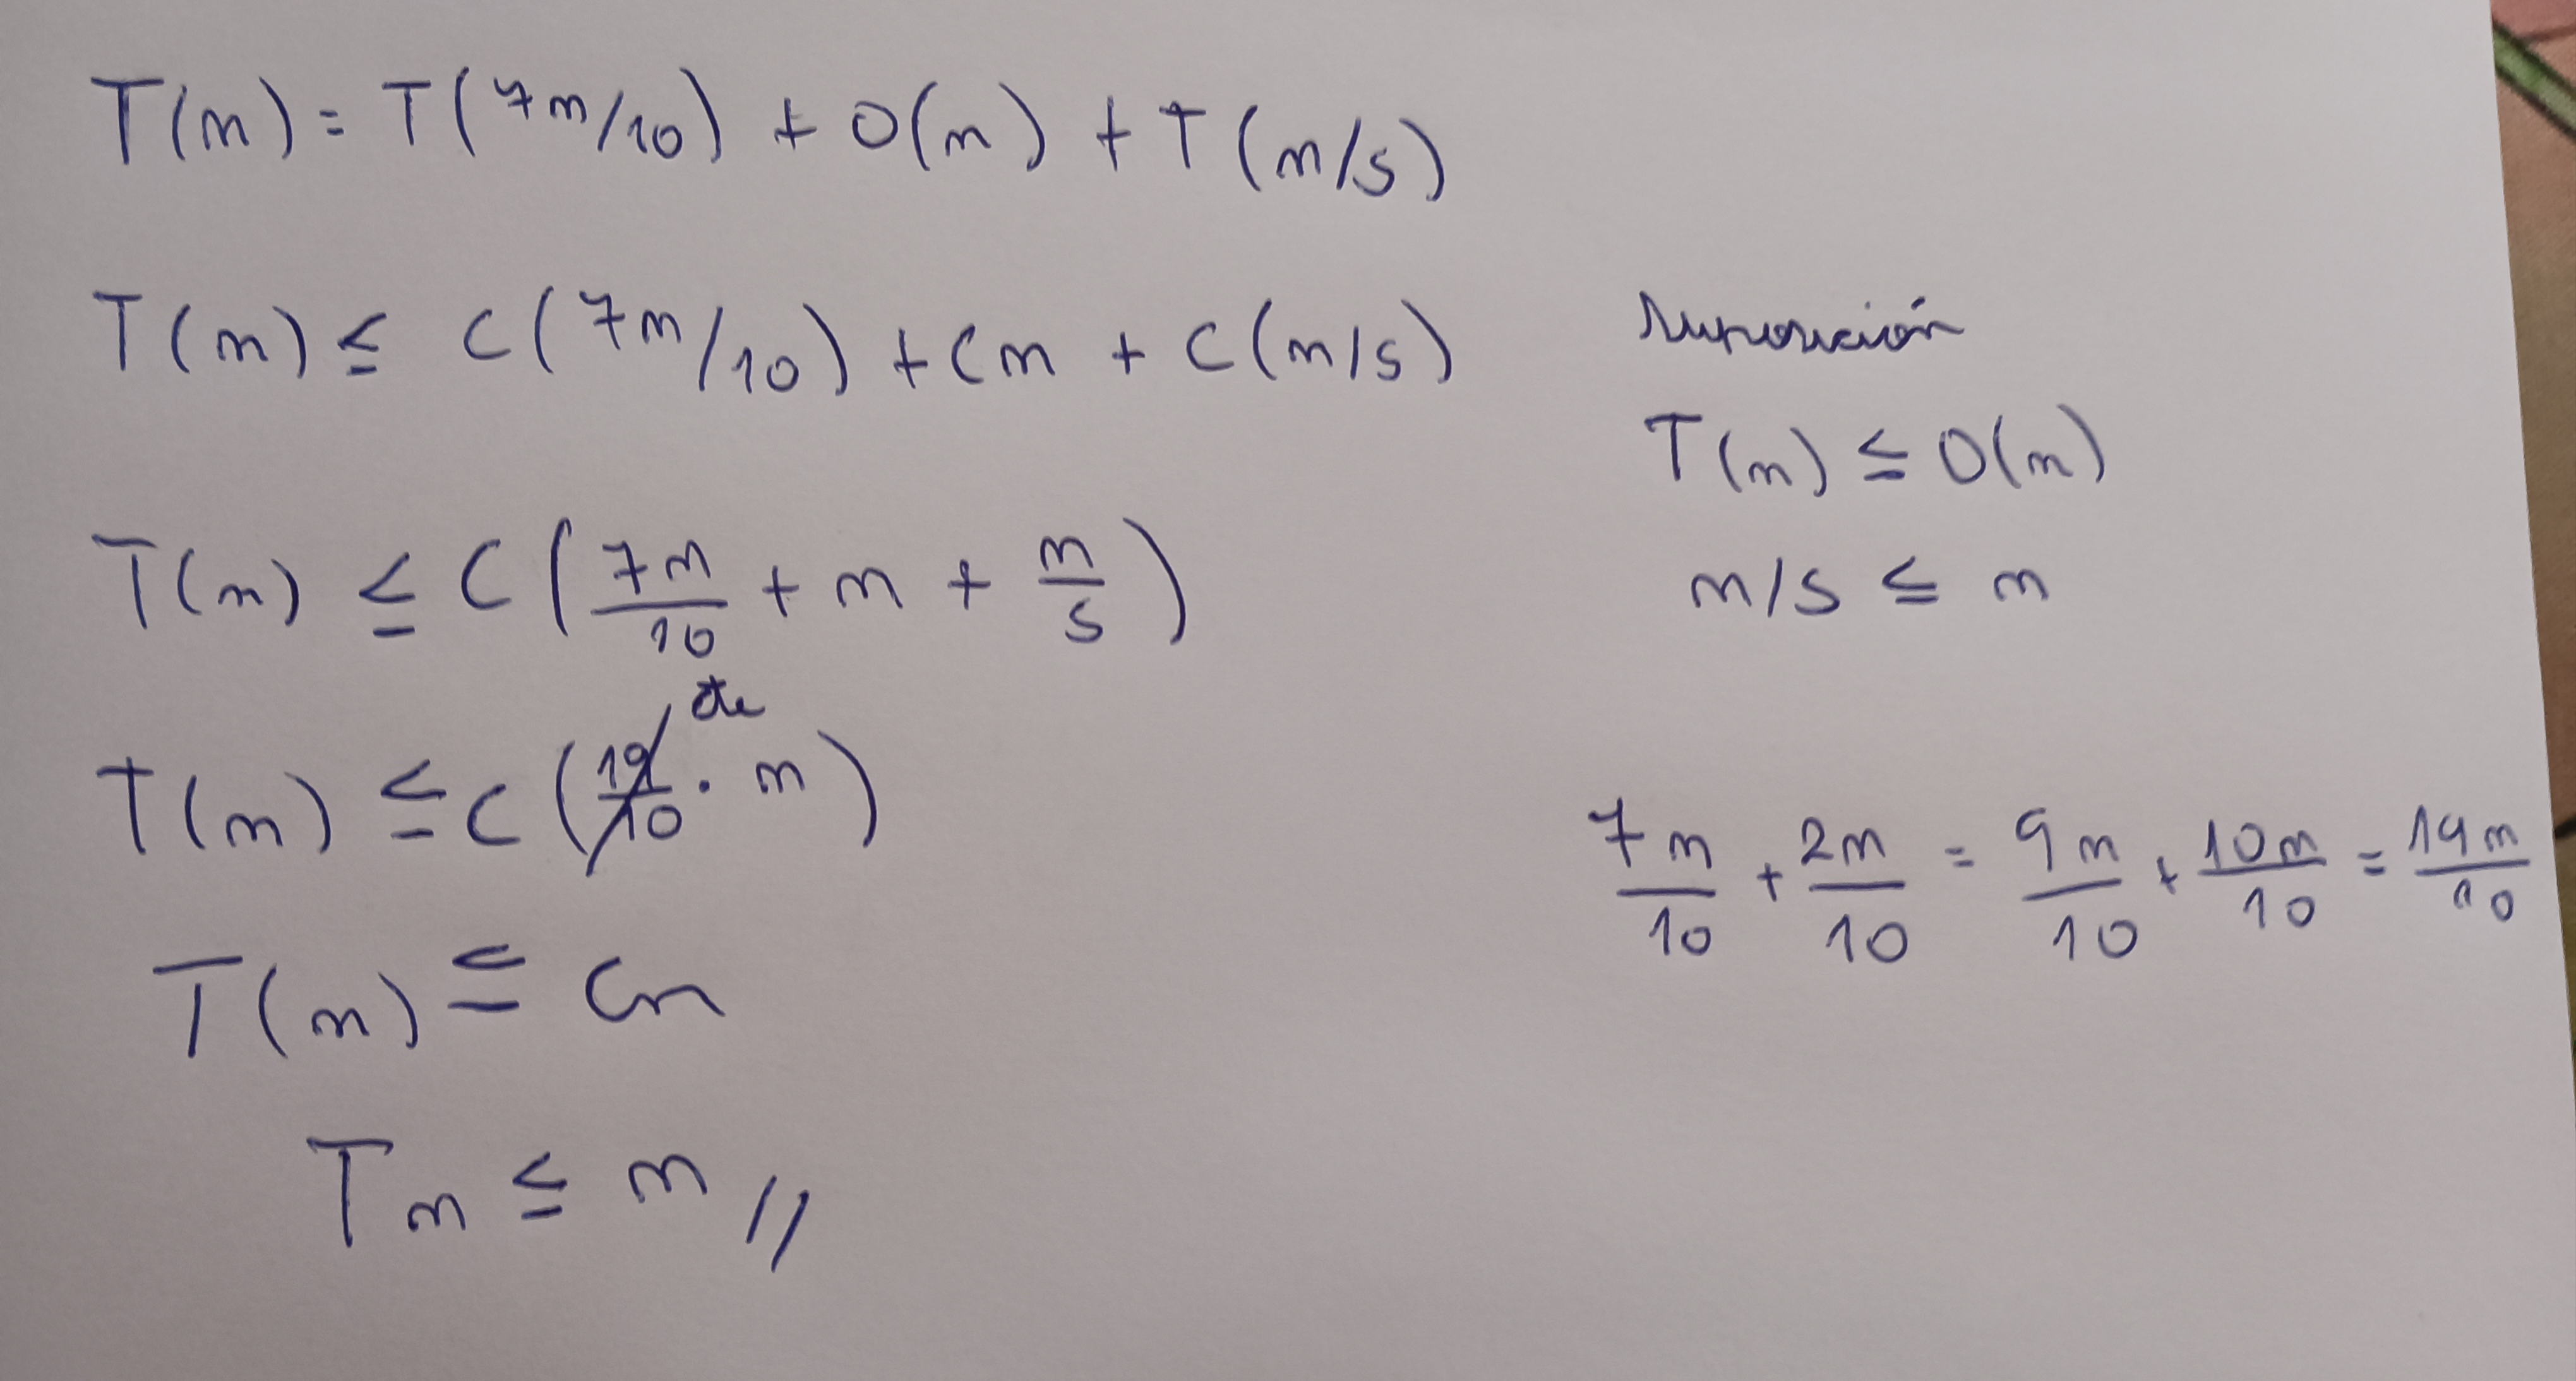

Por lo que el peor caso de nuestro algoritmo Select es O(n)

# 5.- Experimentos

**5.1 Experimento 1**

Para este experimento vamos a ver la comparación entre el mejor caso teórico y el peor caso teórico en cantidad de comparaciones que producen.

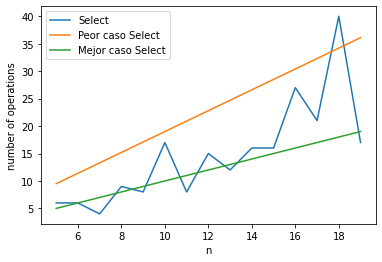

In [106]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y1=[ 19*n/10 for n in range(5,20)] #peor caso
y2=[n for n in range(5,20)] #mejor caso
y=[]
for n in range(5,20):
  a = random.sample(range(1, 50), n)
  cont=0
  verbose=False
  k=1
  a= Select(0,a,0,len(a)-1,k,verbose)
  y.append(cont)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select","Peor caso Select", "Mejor caso Select"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

**observaciones y análisis**

Se puede ver que hay veces que las comparaciones no van en rango y este se puede deber a la elección del pivote en el momento de ejecutar el algoritmo, ya que se hacen más comparaciones si el pivote no es el i-esimo elemento más pequeño, al igual de la eleccion del i-esimo elemento mas pequeño del arreglo.

**5.2 Experimento 2**

En este experimento vamos a comparar el tiempo de ejecucion de nuestro algoritmo Select contra el algoritmo RandomSelect el cual selecciona un pivote al azar.

Para esto se implementará el siguiente algoritmo de RandomSelect:

In [ ]:
from random import randrange

def partition2(x, pivot_index = 0):
    i = 0
    if pivot_index !=0: x[0],x[pivot_index] = x[pivot_index],x[0]
    for j in range(len(x)-1):
        if x[j+1] < x[0]:
            x[j+1],x[i+1] = x[i+1],x[j+1]
            i += 1
    x[0],x[i] = x[i],x[0]
    return x,i

def RSelect(x,k):
    if len(x) == 1:
        return x[0]
    else:
        xpart = partition2(x,randrange(len(x)))
        x = xpart[0] # partitioned array
        j = xpart[1] # pivot index
        if j == k:
            return x[j]
        elif j > k:
            return RSelect(x[:j],k)
        else:
            k = k - j - 1
            return RSelect(x[(j+1):], k)
        
x = [3,1,8,4,7,9]
i=0
print(RSelect(x,i))

1


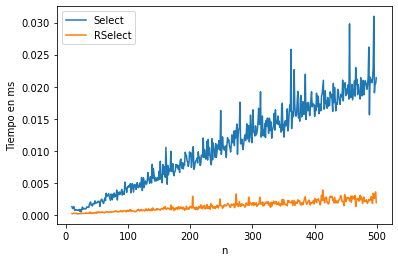

In [ ]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x,y,y1 = [],[],[]
verbose=False

for n in range(10,500):

  a = random.sample(range(1, 1000), n)
  
  k=2
 
  t = repeat(setup="from __main__ import Select", stmt=f"Select({0},{a},{0},{len(a)-1},{k},{verbose})", repeat=1, number=10)
  j = repeat(setup="from __main__ import RSelect", stmt=f"RSelect({a},{k})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(j)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Select","RSelect"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**observaciones y análisis**

Se puede ver que el algoritmo RandomSelect es más eficiente frente a nuestro algoritmo Select y esto se puede deber a la cantidad de operaciones extra que tiene que hacer nuestro algoritmo para encontrar el pivote de mediana de medianas y también la utilización para ordenar estas medianas de InsertionSort.